# Project 11-1: Use multiple regression with the diamonds data

The data for this project is on the Seaborn website, named "diamonds"
Information about the diamonds data set from Seaborn
Diamonds

price: dolar (326 - 18623)

carat: (0.2 - 5.01)

cut: (Fair, Good, Very Good, Premium, Ideal)

color: (from J(worst) to D(best))

clarity: (I1(worst), SI2, SI1, VS2, VS1, VVS1, IF(best))

x: length in mm (0 - 10.74)

y: width in mm (0 - 58.9)

z: depth in mm (0 - 31.8)

depth: Percentage of Total Depth = z / mean(x,y) = 2 * z / (x + y) (43-79)

table: The width of the diamond at its widest point (43-95)

In [1]:
# Import needed modules

# Import pandas and create the alias pd
import pandas as pd

# Import seaborn and create the alias sns
import seaborn as sns

# import the required sklearn modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Task 01
# Read the data from the Seaborn website, "diamonds"

data = sns.load_dataset('diamonds')

In [3]:
# Task 02, run info() and display the first five rows

data.info(memory_usage = 'deep')

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Task 03, display the correlation data for the price column

data.corr()[['price']].sort_values('price', ascending = False)


,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


In [5]:
# Drop the x, y and z collumns.

data.drop(columns = ['x', 'y', 'z'], inplace = True)

data.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [6]:
# Task 04, split the data to create the test and training datasets,
#            using carat, table and depth as the independent data
#            and price as the dependent data

x_train, x_test, y_train, y_test = train_test_split(
    data[['carat', 'table', 'depth']],
    data[['price']], test_size = 0.3, random_state = 42)


In [7]:
# Task 05, create and fit the model

linearModel = LinearRegression()
linearModel.fit(x_train, y_train)


LinearRegression()

In [8]:
# Task 06, score the model with the test dataset

linearModel.score(x_test, y_test)


0.8532031629541936

In [9]:
# Task 07, score the model with the training dataset

linearModel.score(x_train, y_train)


0.8538570928448128

In [10]:
# Task 08, use the model to make a prediction and store in a new DataFrame

y_predict = linearModel.predict(x_test)

predicted = pd.DataFrame(y_predict, columns = ['price_Predicted'])

In [11]:
# Task 09, score the model with the training dataset

final = predicted.join([x_test.reset_index(drop = True),
                               y_test.reset_index(drop = True)])

final.head()

,price_Predicted,carat,table,depth,price
0,-350.845462,0.24,56.0,62.1,559
1,2530.703395,0.58,57.0,60.0,2201
2,1013.986507,0.40,55.0,62.1,1238
3,1231.507829,0.43,57.0,60.8,1304
4,10032.632811,1.55,55.0,62.3,6901


In [12]:
# Task 10, calculate the residual and add it to the DataFrame in step 9

final['residual'] = final.price - final.price_Predicted

final.head()


,price_Predicted,carat,table,depth,price,residual
0,-350.845462,0.24,56.0,62.1,559,909.845462
1,2530.703395,0.58,57.0,60.0,2201,-329.703395
2,1013.986507,0.40,55.0,62.1,1238,224.013493
3,1231.507829,0.43,57.0,60.8,1304,72.492171
4,10032.632811,1.55,55.0,62.3,6901,-3131.632811


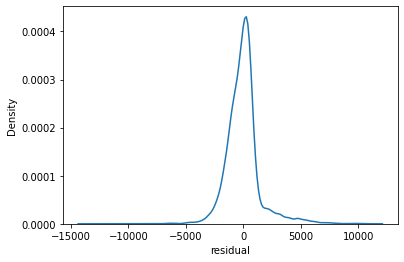

In [13]:
# Task 11, plot the residual dataset in a Seaborn KDE plot

sns.kdeplot(data = final, x = 'residual');
